In [2]:
# Tres importante! Use venv_reliability to run les codes!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

from reliability.Fitters import *
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram

In [3]:
data_fname = "../common_conditions_breed_data.csv"

data = pd.read_csv(data_fname)

In [22]:
female_data = data.loc[data["Sex"]=="F"]["days_alive"].to_numpy()

(array([ 69483., 201574., 304456.,  71012.,  71520.,  67906.,  59853.,
         50313.,  40010.,  31051.]),
 array([   0. ,  365.2,  730.4, 1095.6, 1460.8, 1826. , 2191.2, 2556.4,
        2921.6, 3286.8, 3652. ]),
 <BarContainer object of 10 artists>)

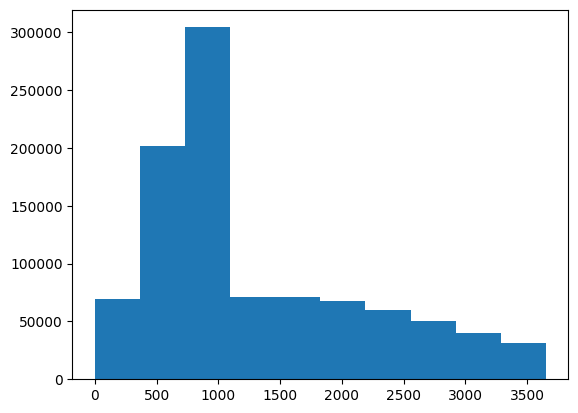

In [23]:
plt.hist(female_data)

In [24]:
np.std(female_data)

875.7840167656717

In [12]:
female_data = data.loc[data["Sex"]=="F"]

774

In [43]:
data_F_only = data.loc[data["Sex"] == "F"]
nF = data_F_only.shape[0]
data_M_only = data.loc[data["Sex"] == "M"]
nM = data_M_only.shape[0]
data_Beef_only = data.loc[data["prod_type"] == "Beef"]
nBeef = data_Beef_only.shape[0]
data_Dairy_only = data.loc[data["prod_type"] == "Dairy"]
nDairy = data_Dairy_only.shape[0]
data_B_only = data.loc[data["Sex"] == "B"]
nB = data_B_only.shape[0]

In [51]:
data["PLEUR..LOCAL"].sum()
data["TB"].sum()

28530

In [19]:
deseases = ['PLEUR.PNEUMONIA.LOCAL', 'OEDEMA', 'NEPHRITIS', 'NAD', 'CONTAMINATION', 'TB.GENERALISED', 'TB', 'ABSCESS.PYAEMIA', 'FLUKE.DAMAGE', 'HYDRONEPHROSIS',
       'PLEUR.PNEUMONIA.GENERAL', 'PETECHAE.HAEMORRHAGES', 'INJECTION.SITES', 'PERITONITIS', 'PLEURISY', 'FACTORY.DAMAGE', 'PERICARDITIS', 'BRUISING', 'SCAR.TISSUE', 'TELANGECTASIS', 'RESIDUES',
       'ARTHRITIS', 'FASCIOLIASIS', 'ACTINO']

In [56]:
data["days_alive"].mean()

1000.7388192245551

In [55]:
N = data.shape[0]
for d in deseases:
    asd = data[d].sum()
    print("{} N = {} ({:2.2f}%)".format(d, asd, 100*asd/N))

PLEUR.PNEUMONIA.LOCAL N = 15431 (0.84%)
OEDEMA N = 3729 (0.20%)
NEPHRITIS N = 6129 (0.33%)
NAD N = 13287 (0.73%)
CONTAMINATION N = 82797 (4.52%)
TB.GENERALISED N = 3566 (0.19%)
TB N = 28530 (1.56%)
ABSCESS.PYAEMIA N = 35622 (1.94%)
FLUKE.DAMAGE N = 100398 (5.48%)
HYDRONEPHROSIS N = 3806 (0.21%)
PLEUR.PNEUMONIA.GENERAL N = 8078 (0.44%)
PETECHAE.HAEMORRHAGES N = 3287 (0.18%)
INJECTION.SITES N = 2220 (0.12%)
PERITONITIS N = 15763 (0.86%)
PLEURISY N = 4476 (0.24%)
FACTORY.DAMAGE N = 10352 (0.56%)
PERICARDITIS N = 7118 (0.39%)
BRUISING N = 13298 (0.73%)
SCAR.TISSUE N = 2568 (0.14%)
TELANGECTASIS N = 6257 (0.34%)
RESIDUES N = 5036 (0.27%)
ARTHRITIS N = 1952 (0.11%)
FASCIOLIASIS N = 40958 (2.23%)
ACTINO N = 1928 (0.11%)


In [44]:
more_fem = 0
for d in deseases:
    pF = 100*data_F_only[d].sum()/nF
    pM = 100*data_M_only[d].sum()/nM
    pBeef = 100*data_Beef_only[d].sum()/nBeef
    pDairy = 100*data_Dairy_only[d].sum()/nDairy
    pB = 100*data_B_only[d].sum()/nB
    # more_fem += (pF > pM)
    # if pF > pM:
    #     print(f"FEMALE mainly {d}")
    # if pF <= pM:
    #     print(f"MALE mainly {d}")
    print("{} -- {:2.2f}% Bulls ".format(d, pB))



# print(more_fem)


PLEUR.PNEUMONIA.LOCAL -- 1.26% Bulls 
OEDEMA -- 0.13% Bulls 
NEPHRITIS -- 0.39% Bulls 
NAD -- 0.84% Bulls 
CONTAMINATION -- 7.15% Bulls 
TB.GENERALISED -- 0.22% Bulls 
TB -- 1.52% Bulls 
ABSCESS.PYAEMIA -- 2.19% Bulls 
FLUKE.DAMAGE -- 4.87% Bulls 
HYDRONEPHROSIS -- 0.15% Bulls 
PLEUR.PNEUMONIA.GENERAL -- 0.53% Bulls 
PETECHAE.HAEMORRHAGES -- 0.20% Bulls 
INJECTION.SITES -- 0.10% Bulls 
PERITONITIS -- 0.68% Bulls 
PLEURISY -- 0.28% Bulls 
FACTORY.DAMAGE -- 0.91% Bulls 
PERICARDITIS -- 0.39% Bulls 
BRUISING -- 0.62% Bulls 
SCAR.TISSUE -- 0.17% Bulls 
TELANGECTASIS -- 0.34% Bulls 
RESIDUES -- 0.32% Bulls 
ARTHRITIS -- 0.27% Bulls 
FASCIOLIASIS -- 1.73% Bulls 
ACTINO -- 0.14% Bulls 
